In [1]:
import torch
import torchvision
import torch.nn as nn
from torch.autograd import Variable

import numpy as np 
import sklearn
import pandas as pd 
import matplotlib.pyplot as plt 
import math

USE_CUDA = torch.cuda.is_available()

In [2]:
Input_num = 2
Hidden = 5
Output_num = 2

In [3]:
#定义模型
model = torch.nn.Sequential(
    torch.nn.Linear(Input_num,Hidden),
    torch.nn.LogSigmoid(),
    torch.nn.Linear(Hidden,Output_num),
)
if USE_CUDA:
    model = model.cuda()

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [4]:
#读取训练数据
x_train_addr = "NC-Train-Data.csv"
y_train_addr = "NC-Train-Label.csv"
x_test_addr = "NC-Test-Data.csv"
y_test_addr = "NC-Test-Label.csv"

data = pd.read_csv(x_train_addr,header=None).values
x_train = torch.tensor(data)
data = pd.read_csv(y_train_addr,header=None).values
y_train = torch.tensor(data)
data = pd.read_csv(x_test_addr,header=None).values
x_test = torch.tensor(data)
data = pd.read_csv(y_test_addr,header=None).values
y_test = torch.tensor(data)

#转成列向量，-1表示自动计算
x_train = x_train.reshape(-1,2)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,2)
y_test = y_test.reshape(-1,1)

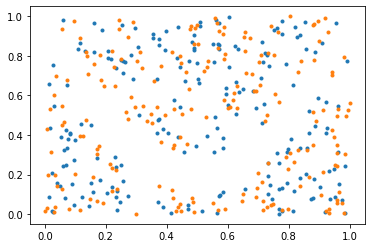

In [5]:
plt.plot(x_train[:,0],x_train[:,1],'.')
plt.plot(x_test[:,0],x_test[:,1],'.')

In [6]:
if USE_CUDA:
    x_train = x_train.cuda()
    y_train = y_train.cuda()
    x_test = x_test.cuda()
    y_test = y_test.cuda()

In [14]:
for epoch in range(50000):
    y_pred = model(x_train.float())
    y = y_train.squeeze();
    loss = loss_fn(y_pred,y)

    if epoch % 200 == 0:
        print("Epoch", epoch, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 0.7071886658668518
Epoch 200 0.25469326972961426
Epoch 400 0.2148597687482834
Epoch 600 0.11880622059106827
Epoch 800 0.048706963658332825
Epoch 1000 0.02336537092924118
Epoch 1200 0.013396723195910454
Epoch 1400 0.008624285459518433
Epoch 1600 0.005972725804895163
Epoch 1800 0.0043465616181492805
Epoch 2000 0.0032785129733383656
Epoch 2200 0.0025407765060663223
Epoch 2400 0.002011144533753395
Epoch 2600 0.0016190825263038278
Epoch 2800 0.0013215726939961314
Epoch 3000 0.0010911382269114256
Epoch 3200 0.0009095828863792121
Epoch 3400 0.0007644405704922974
Epoch 3600 0.0006469520158134401
Epoch 3800 0.0005508323665708303
Epoch 4000 0.00047145222197286785
Epoch 4200 0.0004053644079249352
Epoch 4400 0.0003499446320347488
Epoch 4600 0.00030317672644741833
Epoch 4800 0.0002634907141327858
Epoch 5000 0.000229644647333771
Epoch 5200 0.00020064885029569268
Epoch 5400 0.00017571108764968812
Epoch 5600 0.00015418119437526911
Epoch 5800 0.00013553901226259768
Epoch 6000 0.0001193505304399

In [15]:
torch.save(model,"LinearClassify.pth")

In [16]:
with torch.no_grad():
    y_pred = model(x_test.float())

In [ ]:
torch.nn.Softmax

In [18]:
m = nn.Softmax(dim=1)  
input = torch.randn(2, 3)  
m(input)

tensor([[0.2653, 0.1723, 0.5624],
        [0.4071, 0.1837, 0.4092]])

In [17]:
y_pred 

tensor([[-21509.9375, -21565.7852],
        [-28633.8203, -28682.1797],
        [-19538.4727, -19559.2773],
        [-19993.6914, -20020.7930],
        [-24652.0625, -24781.2832],
        [-23176.4375, -23279.0977],
        [-21341.7305, -21385.9141],
        [-21392.9570, -21458.3672],
        [-20788.5020, -20840.7578],
        [-26052.8262, -26091.4844],
        [-22448.4961, -22515.8008],
        [-25789.6875, -25934.0176],
        [-20008.8496, -20032.9316],
        [-21628.7207, -21685.2695],
        [-22859.0410, -22951.2090],
        [-26020.5742, -26169.8203],
        [-28068.7656, -28190.2871],
        [-19457.0898, -19474.8965],
        [-19313.3574, -19335.3848],
        [-21260.5801, -21305.7969],
        [-20769.2988, -20788.5938],
        [-24012.5918, -24130.2461],
        [-24681.7480, -24812.4688],
        [-23110.3262, -23207.1367],
        [-19145.1719, -19163.7598],
        [-22409.0488, -22484.2227],
        [-22123.5898, -22196.2734],
        [-27058.2500, -27191

In [19]:
m(y_pred)

tensor([[1.0000e+00, 5.5676e-25],
        [1.0000e+00, 9.9492e-22],
        [1.0000e+00, 9.2180e-10],
        [1.0000e+00, 1.6980e-12],
        [1.0000e+00, 0.0000e+00],
        [1.0000e+00, 2.8026e-45],
        [1.0000e+00, 6.4760e-20],
        [1.0000e+00, 3.9150e-29],
        [1.0000e+00, 2.0210e-23],
        [1.0000e+00, 1.6254e-17],
        [1.0000e+00, 5.8877e-30],
        [1.0000e+00, 0.0000e+00],
        [1.0000e+00, 3.4778e-11],
        [1.0000e+00, 2.7616e-25],
        [1.0000e+00, 9.3747e-41],
        [1.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00],
        [1.0000e+00, 1.8479e-08],
        [1.0000e+00, 2.7142e-10],
        [1.0000e+00, 2.3046e-20],
        [1.0000e+00, 4.1718e-09],
        [1.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00],
        [1.0000e+00, 9.0244e-43],
        [1.0000e+00, 8.4602e-09],
        [1.0000e+00, 2.2512e-33],
        [1.0000e+00, 2.7159e-32],
        [1.0000e+00, 0.0000e+00],
        [1.0000e+00, 3.3447e-37],
        [1.000